<a href="https://colab.research.google.com/github/Falconwatch/MarketKing/blob/feature%2Fpredict_high/High_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В этом ноутбуке развивается предсказатель высшей точки. Его цель - предсказывать, что мы находимя в локлаьном максимуме - цены выше на заданном горизонте в будущем не будет

In [2]:
#!pip install yfinance

In [112]:
from numpy.core.numeric import isclose
import yfinance
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import isclose
%matplotlib inline

In [51]:
from methods import load_data

In [78]:
stocks = load_data("msft", period_start="2021-01-01")
stocks.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2021-01-04,220.224826,220.689959,212.584796,215.434967,37130100
2021-01-05,215.009407,216.256364,213.465569,215.642776,23823000
2021-01-06,209.972142,214.247399,209.744529,210.051315,35930700
2021-01-07,211.822773,217.067874,211.496205,216.028748,27694500
2021-01-08,216.414721,218.295048,214.781819,217.344986,22956200


# Размечаем таргет

In [79]:
def mark_target(prices, window=10):
  """Размечаем фактические точки лоу и хай"""
  maxes = stocks["Close"].rolling(window=window, center=True).max()

  targets = np.zeros_like(prices)
  targets[prices==maxes]=1
  return targets

targets = mark_target(stocks["Close"])
stocks["target"] = targets

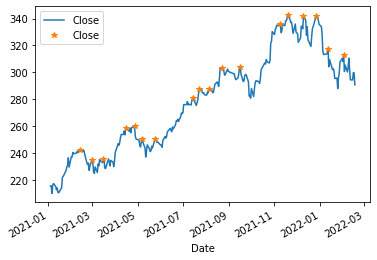

In [80]:
stocks["Close"].plot()
stocks.loc[stocks["target"]==1, "Close"].plot(style="*")
plt.legend()

# Скользящие средние?

In [149]:
def create_ma(prices, ma_steps=[5,10,15,20]):
  """Фозвращает датафрейм с ценой и её скользящими средними заданной ширины"""
  result=pd.DataFrame()
  result["price"] = prices
  for ma_step in ma_steps:
    ma = prices.rolling(ma_step).mean()
    result["ma_{}".format(ma_step)] = ma
  return result

In [150]:
stock_ma = create_ma(stocks["Close"], ma_steps=np.arange(5, 61, 5))

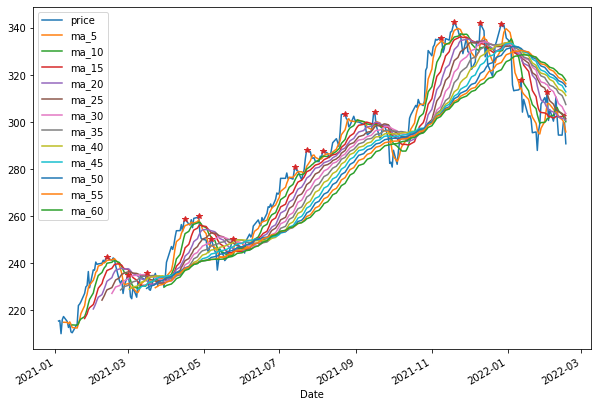

In [151]:
stock_ma.plot(figsize=[10,7])
stocks.loc[stocks["target"]==1, "Close"].plot(style="*")

In [152]:
def find_sell_signals(short_ma, long_ma):
  """ищем сигнал "продавать" - короткое МА пересекает длинное МА сверху"""
  short_higher = short_ma.shift(-1) > long_ma.shift(-1) #короткое было выше
  short_lower = short_ma.shift(1) < long_ma.shift(1) #короткое стало ниже

  sell_signals = short_higher & short_lower
  return sell_signals

In [162]:
sell_signals = pd.DataFrame()
for i in range(1, len(stock_ma.columns)):
  short_ma_name = stock_ma.columns[i]
  short_ma = stock_ma[short_ma_name]
  for j in range(i, len(stock_ma.columns)):
    long_ma_name = stock_ma.columns[j]
    long_ma = stock_ma[long_ma_name]
    sell_signals_name = "{0}_{1}_sell_signal".format(short_ma_name, long_ma_name)
    sell_signals[sell_signals_name] = find_sell_signals(short_ma, long_ma)
  

In [163]:
sell_signals.sum()

ma_5_ma_5_sell_signal       0
ma_5_ma_10_sell_signal     26
ma_5_ma_15_sell_signal     16
ma_5_ma_20_sell_signal     14
ma_5_ma_25_sell_signal     11
                           ..
ma_50_ma_55_sell_signal     4
ma_50_ma_60_sell_signal     4
ma_55_ma_55_sell_signal     0
ma_55_ma_60_sell_signal     4
ma_60_ma_60_sell_signal     0
Length: 78, dtype: int64

In [166]:
sell_signals

,ma_5_ma_5_sell_signal,ma_5_ma_10_sell_signal,ma_5_ma_15_sell_signal,ma_5_ma_20_sell_signal,ma_5_ma_25_sell_signal,ma_5_ma_30_sell_signal,ma_5_ma_35_sell_signal,ma_5_ma_40_sell_signal,ma_5_ma_45_sell_signal,ma_5_ma_50_sell_signal,ma_5_ma_55_sell_signal,ma_5_ma_60_sell_signal,ma_10_ma_10_sell_signal,ma_10_ma_15_sell_signal,ma_10_ma_20_sell_signal,ma_10_ma_25_sell_signal,ma_10_ma_30_sell_signal,ma_10_ma_35_sell_signal,ma_10_ma_40_sell_signal,ma_10_ma_45_sell_signal,ma_10_ma_50_sell_signal,ma_10_ma_55_sell_signal,ma_10_ma_60_sell_signal,ma_15_ma_15_sell_signal,ma_15_ma_20_sell_signal,ma_15_ma_25_sell_signal,ma_15_ma_30_sell_signal,ma_15_ma_35_sell_signal,ma_15_ma_40_sell_signal,ma_15_ma_45_sell_signal,ma_15_ma_50_sell_signal,ma_15_ma_55_sell_signal,ma_15_ma_60_sell_signal,ma_20_ma_20_sell_signal,ma_20_ma_25_sell_signal,ma_20_ma_30_sell_signal,ma_20_ma_35_sell_signal,ma_20_ma_40_sell_signal,ma_20_ma_45_sell_signal,ma_20_ma_50_sell_signal,ma_20_ma_55_sell_signal,ma_20_ma_60_sell_signal,ma_25_ma_25_sell_signal,ma_25_ma_30_sell_signal,ma_25_ma_35_sell_signal,ma_25_ma_40_sell_signal,ma_25_ma_45_sell_signal,ma_25_ma_50_sell_signal,ma_25_ma_55_sell_signal,ma_25_ma_60_sell_signal,ma_30_ma_30_sell_signal,ma_30_ma_35_sell_signal,ma_30_ma_40_sell_signal,ma_30_ma_45_sell_signal,ma_30_ma_50_sell_signal,ma_30_ma_55_sell_signal,ma_30_ma_60_sell_signal,ma_35_ma_35_sell_signal,ma_35_ma_40_sell_signal,ma_35_ma_45_sell_signal,ma_35_ma_50_sell_signal,ma_35_ma_55_sell_signal,ma_35_ma_60_sell_signal,ma_40_ma_40_sell_signal,ma_40_ma_45_sell_signal,ma_40_ma_50_sell_signal,ma_40_ma_55_sell_signal,ma_40_ma_60_sell_signal,ma_45_ma_45_sell_signal,ma_45_ma_50_sell_signal,ma_45_ma_55_sell_signal,ma_45_ma_60_sell_signal,ma_50_ma_50_sell_signal,ma_50_ma_55_sell_signal,ma_50_ma_60_sell_signal,ma_55_ma_55_sell_signal,ma_55_ma_60_sell_signal,ma_60_ma_60_sell_signal
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-01-04,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2021-01-05,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2021-01-06,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2021-01-07,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2021-01-08,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fals

In [185]:

sell_signals_tmp = sell_signals.copy().astype(int)
sell_signals_tmp = sell_signals_tmp*400

In [186]:
sell_signals_tmp.sum()

ma_5_ma_5_sell_signal          0
ma_5_ma_10_sell_signal     10400
ma_5_ma_15_sell_signal      6400
ma_5_ma_20_sell_signal      5600
ma_5_ma_25_sell_signal      4400
                           ...  
ma_50_ma_55_sell_signal     1600
ma_50_ma_60_sell_signal     1600
ma_55_ma_55_sell_signal        0
ma_55_ma_60_sell_signal     1600
ma_60_ma_60_sell_signal        0
Length: 78, dtype: int64

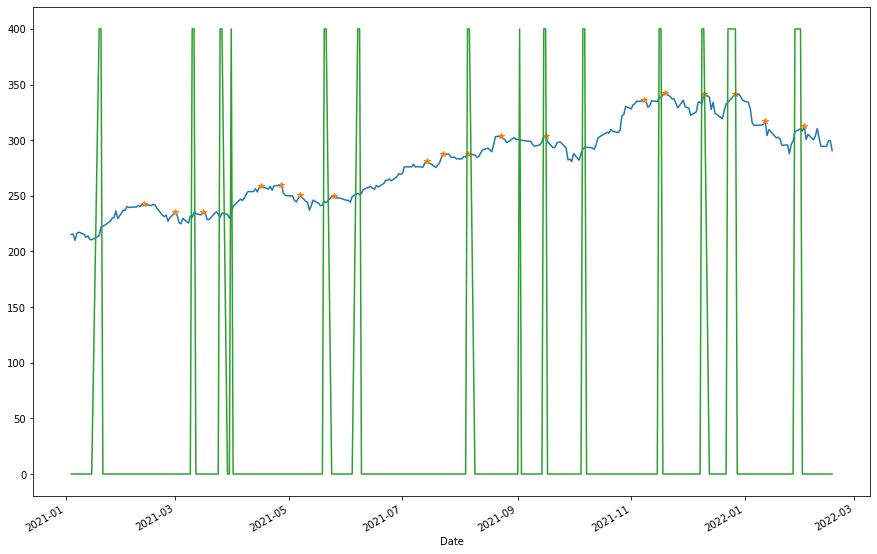

In [187]:
ax = stocks["Close"].plot(figsize=[15,10])
stocks.loc[stocks["target"]==1, "Close"].plot(style="*")
#stocks.loc[sell_signals, "Close"].rename("Sell", axis=1).plot(style=">")
sell_signals_tmp["ma_5_ma_10_sell_signal"].plot()

In [126]:
points.loc[points]

Date
2021-06-23    True
2021-06-24    True
dtype: bool

# Изменение цены

In [103]:
price_diffs = stocks["Close"].diff()

In [109]:
price_diffs.mean()

0.26512339417363556

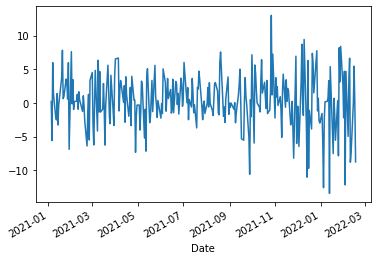

In [107]:
price_diffs.plot()

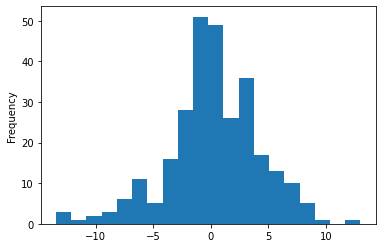

In [108]:
price_diffs.plot(kind="hist", bins=20)

In [38]:
np.zeros()[prices==maxes]

Date
1986-03-13    False
1986-03-14    False
1986-03-17    False
1986-03-18    False
1986-03-19    False
              ...  
2022-02-11    False
2022-02-14    False
2022-02-15    False
2022-02-16    False
2022-02-17    False
Name: Close, Length: 9059, dtype: bool

In [36]:
t[-10:]

Date
2022-02-04    312.813171
2022-02-07    312.813171
2022-02-08    312.813171
2022-02-09    312.813171
2022-02-10    310.567810
2022-02-11    310.567810
2022-02-14           NaN
2022-02-15           NaN
2022-02-16           NaN
2022-02-17           NaN
Name: Close, dtype: float64

In [21]:
len(t)

9059

In [14]:
stocks["Close"]

Date
1986-03-13      0.061252
1986-03-14      0.063439
1986-03-17      0.064533
1986-03-18      0.062892
1986-03-19      0.061799
                 ...    
2022-02-11    294.431213
2022-02-14    294.391296
2022-02-15    299.850006
2022-02-16    299.500000
2022-02-17    290.730011
Name: Close, Length: 9059, dtype: float64